In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
pip install mlxtend


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.read_csv("Oder3.csv")
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,10/30/2016 9:58,Morning,Weekend
1,2,Scandinavian,10/30/2016 10:05,Morning,Weekend
2,2,Scandinavian,10/30/2016 10:05,Morning,Weekend
3,3,Hot chocolate,10/30/2016 10:07,Morning,Weekend
4,3,Jam,10/30/2016 10:07,Morning,Weekend


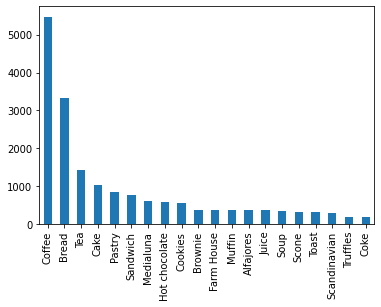

In [ ]:
df['Items'].value_counts().head(20).plot.bar()

In [ ]:
df = df.groupby(['TransactionNo','Items'])['Items'].count().unstack().fillna(0)

In [ ]:
df.head(20)

Items,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
TransactionNo,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def encode(x):
  if(x>=1):
    return 1
  else: return 0

df = df.applymap(encode)

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

freq_items = apriori(df,min_support=0.001,use_colnames=True)

In [ ]:
freq_items

,support,itemsets
0,0.004543,(Afternoon with the baker)
1,0.036344,(Alfajores)
2,0.004015,(Art Tray)
3,0.016059,(Baguette)
4,0.005071,(Bakewell)
...,...,...
466,0.001585,"(Tea, Soup, Sandwich)"
467,0.001373,"(Tea, Cake, Coffee, Bread)"
468,0.001057,"(Pastry, Hot chocolate, Coffee, Bread)"
469,0.001162,"(Pastry, Medialuna, Coffee, Bread)"


In [ ]:
rules = association_rules(freq_items,metric="lift",min_threshold=1)

In [ ]:
rules.sort_values('confidence',ascending=False,inplace=True)

In [ ]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
756,"(Extra Salami or Feta, Salad)",(Coffee),0.001690,0.478394,0.001479,0.875000,1.829036,0.000670,4.172847
900,"(Toast, Pastry)",(Coffee),0.001585,0.478394,0.001373,0.866667,1.811617,0.000615,3.912044
766,"(Hearty & Seasonal, Sandwich)",(Coffee),0.001479,0.478394,0.001268,0.857143,1.791709,0.000560,3.651241
904,"(Sandwich, Salad)",(Coffee),0.001902,0.478394,0.001585,0.833333,1.741939,0.000675,3.129635
645,"(Vegan mincepie, Cake)",(Coffee),0.001268,0.478394,0.001057,0.833333,1.741939,0.000450,3.129635
...,...,...,...,...,...,...,...,...,...
557,(Coffee),"(Brownie, Medialuna)",0.478394,0.002007,0.001057,0.002208,1.100172,0.000096,1.000202
713,(Coffee),"(Chicken Stew, Sandwich)",0.478394,0.002007,0.001057,0.002208,1.100172,0.000096,1.000202
981,(Coffee),"(Pastry, Hot chocolate, Bread)",0.478394,0.001585,0.001057,0.002208,1.393551,0.000298,1.000625
648,(Coffee),"(Vegan mincepie, Cake)",0.478394,0.001268,0.001057,0.002208,1.741939,0.000450,1.000943
